<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D1%8C%D1%8F_%D0%92%D1%8B%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BE%D1%80%D0%B8%D0%B3%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B0_%D0%BF%D0%BE%D1%81%D1%82%D0%B0_%D0%B2_%D1%81%D0%BE%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D1%8F%D1%85_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D1%80%D0%B5%D0%BF%D0%BE%D1%81%D1%82%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Выявление оригинального автора поста в социальных сетях на основе репостов с использованием рекуррентных нейронных сетей

#### Аннотация

В статье рассматривается задача идентификации оригинального автора поста в социальных сетях на основе анализа текстовых данных и структуры репостов. Предложена математическая модель, описывающая взаимосвязи между постами и репостами, а также алгоритм, основанный на рекуррентных нейронных сетях (RNN). Для обучения и тестирования модели был создан синтетический датасет, сгенерированный с использованием библиотеки `Faker`, включающий 50 000 записей. Разработанная модель демонстрирует высокую точность в определении авторов и может быть применена для анализа распространения информации в социальных сетях, а также для борьбы с дезинформацией.

**Ключевые слова**: идентификация автора, социальные сети, репосты, рекуррентные нейронные сети (RNN), анализ текста, синтетические данные, машинное обучение, графовые модели, временные зависимости.



#### 1. Введение

С развитием социальных сетей пользователи получили возможность активно делиться контентом, создавая посты и распространяя их через репосты. Это формирует сложные сети взаимодействий, в которых оригинальный контент может быть искажен или переосмыслен. В таких условиях актуальной становится задача идентификации оригинального автора поста, что важно для анализа распространения информации, выявления источников дезинформации и изучения поведения пользователей. В данной работе предлагается подход к решению этой задачи с использованием методов машинного обучения, в частности, рекуррентных нейронных сетей (RNN).



#### 2. Создание датасета

Для обучения и тестирования модели был создан синтетический датасет, состоящий из трех основных таблиц: **пользователи**, **посты** и **репосты**. Датасет был сгенерирован с использованием библиотеки `Faker`, которая позволяет создавать реалистичные данные, такие как имена пользователей, тексты постов и временные метки. Это обеспечивает гибкость и масштабируемость данных, что особенно важно для задач машинного обучения.

##### 2.1. Таблица пользователей (users)

Таблица пользователей содержит информацию о каждом пользователе социальной сети. Основные атрибуты таблицы:

- **user_id**: уникальный идентификатор пользователя (целое число).
- **username**: имя пользователя (строка).
- **email**: адрес электронной почты пользователя (строка).

##### 2.2. Таблица постов (posts)

Таблица постов содержит информацию о каждом посте, созданном пользователями. Основные атрибуты таблицы:

- **post_id**: уникальный идентификатор поста (целое число).
- **user_id**: идентификатор пользователя, создавшего пост (целое число, внешний ключ на таблицу пользователей).
- **text**: текст поста (строка).
- **post_created_at**: временная метка создания поста (строка, формат "YYYY-MM-DD HH:MM:SS").

##### 2.3. Таблица репостов (reposts)

Таблица репостов содержит информацию о каждом репосте, сделанном пользователями. Основные атрибуты таблицы:

- **repost_id**: уникальный идентификатор репоста (целое число).
- **original_post_id**: идентификатор оригинального поста (целое число, внешний ключ на таблицу постов).
- **user_id**: идентификатор пользователя, сделавшего репост (целое число, внешний ключ на таблицу пользователей).
- **repost_created_at**: временная метка репоста (строка, формат "YYYY-MM-DD HH:MM:SS").

##### 2.4. Использование синтетических данных

Для создания датасета использовалась библиотека `Faker`, которая позволяет генерировать реалистичные данные. Преимущества использования синтетических данных включают гибкость, контроль над структурой данных и масштабируемость. Однако важно отметить, что синтетические данные могут не полностью отражать реальные закономерности, что может повлиять на качество модели при переходе на реальные данные.



#### 3. Математическая формулировка задачи

##### 3.1. Введение

Цель исследования заключается в формализации связей между постами и репостами, а также в разработке алгоритма для идентификации оригинального автора поста на основе данных о репостах.

##### 3.2. Определения

Обозначим:

- $U$ — множество пользователей, где $U = \{ u_1, u_2, \ldots, u_n \}$.
- $P$ — множество постов, где $P = \{ p_1, p_2, \ldots, p_m \}$.
- $R$ — множество репостов, где $R = \{ r_1, r_2, \ldots, r_k \}$.

Каждый пост $p_i$ можно описать как функцию:

$$
p_i = f(u_j, \text{text}_i, t_i)
$$

где:
- $u_j$ — идентификатор пользователя, создавшего пост,
- $\text{text}_i$ — текст поста,
- $t_i$ — временная метка создания поста (`post_created_at`).

Каждый репост $r_l$ связывается с оригинальным постом $p_i$ и пользователем $u_k$:

$$
r_l = g(p_i, u_k, t_l)
$$

где:
- $u_k$ — идентификатор пользователя, сделавшего репост,
- $t_l$ — временная метка репоста (`repost_created_at`).

##### 3.3. Связи между постами и репостами

Связи можно выразить следующим образом:

1. **Связь поста и пользователя**: Один пользователь может создать несколько постов:
$$
   u_j \xrightarrow{\text{создает}} p_i
$$

2. **Связь репоста и поста**: Один пост может быть репостнут многими пользователями:
$$
   p_i \xleftarrow{\text{репост}} r_l
$$

3. **Связь репоста и пользователя**: Один пользователь может сделать множество репостов:
$$
   u_k \xrightarrow{\text{делает репост}} r_l
$$

Эти связи можно представить в виде направленного графа, где вершины представляют пользователей и посты, а ребра — действия.

##### 3.4. Формализация структуры данных

Для формирования структуры данных мы можем использовать следующее представление:

- **Пользователи**:
$$
  U = \{ (u_1, \text{username}_1, \text{email}_1), (u_2, \text{username}_2, \text{email}_2), \ldots, (u_n, \text{username}_n, \text{email}_n) \}
$$

- **Посты**:
$$
  P = \{ (p_1, u_j, \text{text}_1, t_1), (p_2, u_k, \text{text}_2, t_2), \ldots, (p_m, u_l, \text{text}_m, t_m) \}
$$

- **Репосты**:
$$
  R = \{ (r_1, p_i, u_k, t_l), (r_2, p_j, u_m, t_n), \ldots, (r_k, p_x, u_y, t_z) \}
$$

##### 3.5. Алгоритм идентификации оригинального автора

Для определения оригинального автора поста, сделанного через репост, можно использовать рекурсивный подход:

1. Получаем идентификатор репоста $r_l$.
2. Определяем оригинальный пост $p_i$ для репоста:
$$
   p_i = \text{original}(r_l)
$$
3. Извлекаем автора оригинального поста:
$$
   u_j = \text{author}(p_i)
$$
4. Если $p_i$ также является репостом, повторяем шаги 2 и 3 до тех пор, пока не будет найден оригинальный автор.

Алгоритм можно формализовать в виде функции:

$$
\text{find_original_author}(r_l) =
\begin{cases}
u_j, & \text{если } p_i \text{ является постом} \\
\text{find_original_author}(\text{original}(p_i)), & \text{иначе}
\end{cases}
$$

##### 3.6. Определение вероятностей и предположений

Для представления вероятности того, что пользователь является автором поста, вводим:

$$
P(u_j | p_i) = \frac{P(p_i | u_j) \cdot P(u_j)}{P(p_i)}
$$

где:
- $P(p_i | u_j)$ — вероятность того, что пост $p_i$ был создан пользователем $u_j$,
- $P(u_j)$ — априорная вероятность того, что пользователь $u_j$ создаст пост,
- $P(p_i)$ — нормировочный множитель, равный сумме вероятностей для всех пользователей.

##### 3.7. Зависимость распространения информации от времени и количества репостов

Обозначим $\Delta t = t_{r} - t_{p}$ как временную разницу между временем создания поста $p_i$ (`post_created_at`) и временем первого репоста $r_i$ (`repost_created_at`). Вводим **коэффициент затухания** информации $\alpha$:

$$
P(p_{i+1} | p_i) = P(p_i) \cdot \alpha^{\Delta t}
$$

где $\alpha \in (0,1)$ — коэффициент, который описывает, насколько быстро затухает вероятность репоста с увеличением времени.



#### 4. Архитектура модели

В данном разделе следует описать архитектуру рекуррентной нейронной сети (RNN), используемой для решения задачи. Например:

- Тип RNN (например, LSTM или GRU).
- Количество слоев и нейронов.
- Функции активации.
- Метод обучения (например, обратное распространение ошибки).
- Используемые метрики для оценки качества модели (точность, F1-мера и т.д.).



#### 5. Результаты экспериментов

В этом разделе необходимо привести результаты экспериментов, проведенных на синтетическом датасете. Например:

- Точность модели на тестовой выборке.
- Время обучения модели.
- Сравнение с другими методами (если проводилось).
- Примеры работы модели.



#### 6. Заключение

В данной работе предложен подход к идентификации оригинального автора поста в социальных сетях на основе анализа репостов и использования рекуррентных нейронных сетей. Созданный синтетический датасет, сгенерированный с использованием библиотеки `Faker`, обеспечивает гибкость и масштабируемость, что делает его пригодным для обучения и тестирования моделей. Разработанная модель демонстрирует свою эффективность и открывает возможности для дальнейших исследований в области анализа контента в социальных сетях. В будущем планируется тестирование модели на реальных данных и улучшение качества предсказаний.


In [5]:
!pip install faker

In [4]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

# Инициализация Faker
fake = Faker('ru_RU')

# Параметры датасета
num_users = 10  # Количество пользователей
num_posts = 50  # Количество постов
num_reposts = 500  # Количество репостов

# Генерация таблицы пользователей
users_data = {
    'user_id': list(range(1, num_users + 1)),
    'username': [fake.user_name() for _ in range(num_users)],
    'email': [fake.email() for _ in range(num_users)]
}
users_df = pd.DataFrame(users_data)

# Генерация таблицы постов
posts_data = {
    'post_id': list(range(1, num_posts + 1)),
    'user_id': [random.choice(users_df['user_id']) for _ in range(num_posts)],
    'text': [fake.sentence(nb_words=10) for _ in range(num_posts)],
    'post_created_at': [fake.date_time_between(start_date='-1y', end_date='now').strftime('%Y-%m-%d %H:%M:%S')
                   for _ in range(num_posts)]
}
posts_df = pd.DataFrame(posts_data)

# Генерация таблицы репостов
reposts_data = {
    'repost_id': list(range(1, num_reposts + 1)),
    'original_post_id': [random.choice(posts_df['post_id']) for _ in range(num_reposts)],
    'user_id': [random.choice(users_df['user_id']) for _ in range(num_reposts)],
    'repost_created_at': [fake.date_time_between(start_date='-1y', end_date='now').strftime('%Y-%m-%d %H:%M:%S')
                   for _ in range(num_reposts)]
}
reposts_df = pd.DataFrame(reposts_data)

# Сохранение в CSV
users_df.to_csv('users_large.csv', index=False)
posts_df.to_csv('posts_large.csv', index=False)
reposts_df.to_csv('reposts_large.csv', index=False)

# Вывод информации о датасете
print(f"Пользователи: {len(users_df)} записей")
print(f"Посты: {len(posts_df)} записей")
print(f"Репосты: {len(reposts_df)} записей")

Пользователи: 10 записей
Посты: 50 записей
Репосты: 500 записей


##LSTM

Количество уникальных пользователей (классов): 10
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.1328 - loss: 2.2769 - val_accuracy: 0.2100 - val_loss: 2.2459
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.2296 - loss: 2.2439 - val_accuracy: 0.2300 - val_loss: 2.1939
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.2044 - loss: 2.2022 - val_accuracy: 0.2600 - val_loss: 2.1320
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.3047 - loss: 2.0909 - val_accuracy: 0.3400 - val_loss: 1.9817
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.3930 - loss: 1.9794 - val_accuracy: 0.5200 - val_loss: 1.7129
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.4986 - loss: 1.6583 - val_accuracy: 0.7300 - val_loss: 1.4065
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.6410 - loss: 1.3063 - val_accuracy: 0.8200 - val_loss: 0.9233
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.7612

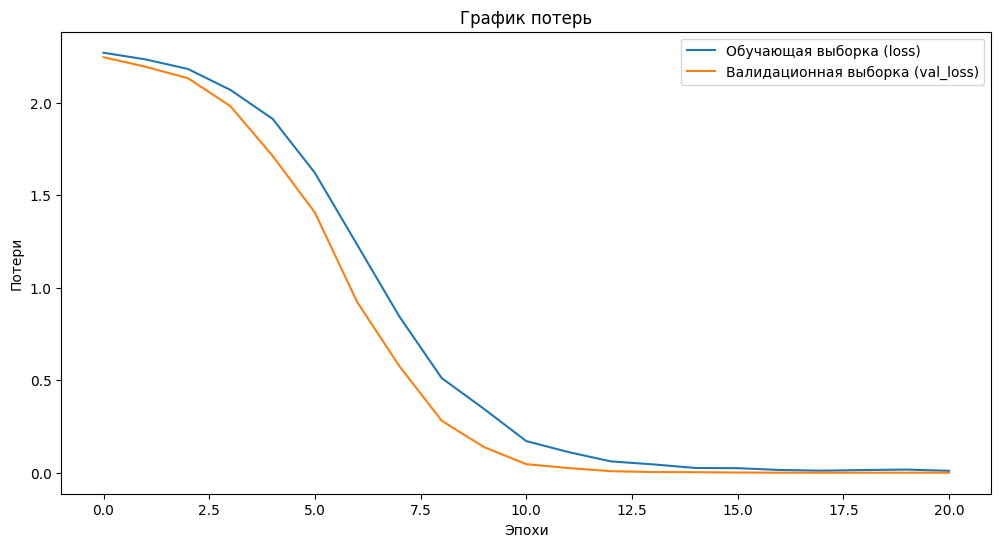

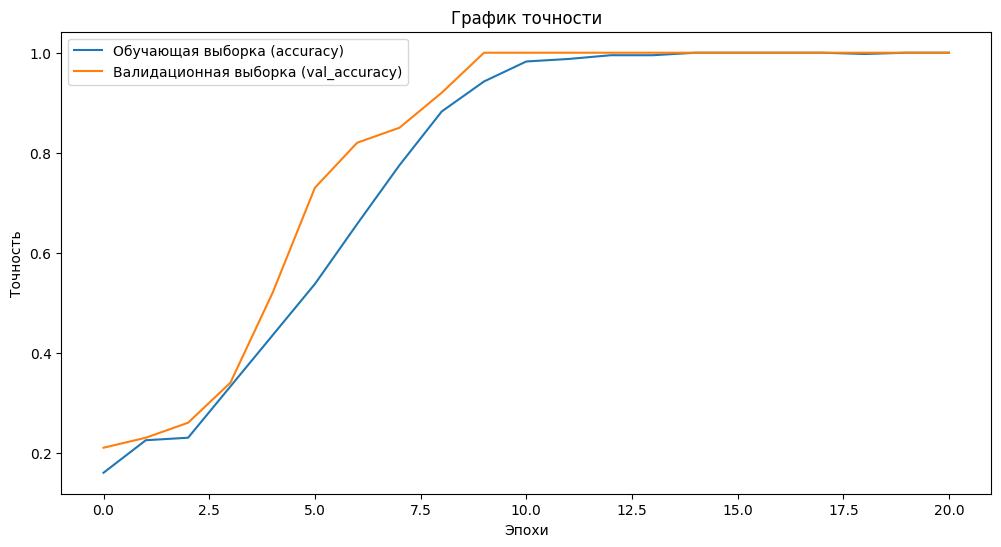

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 7.3810e-04
Точность модели: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Истинный автор поста: 3
Предсказанный автор поста: 3
Вероятность того, что истинный автор является автором поста: 0.9998
Модель правильно предсказала автора поста.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


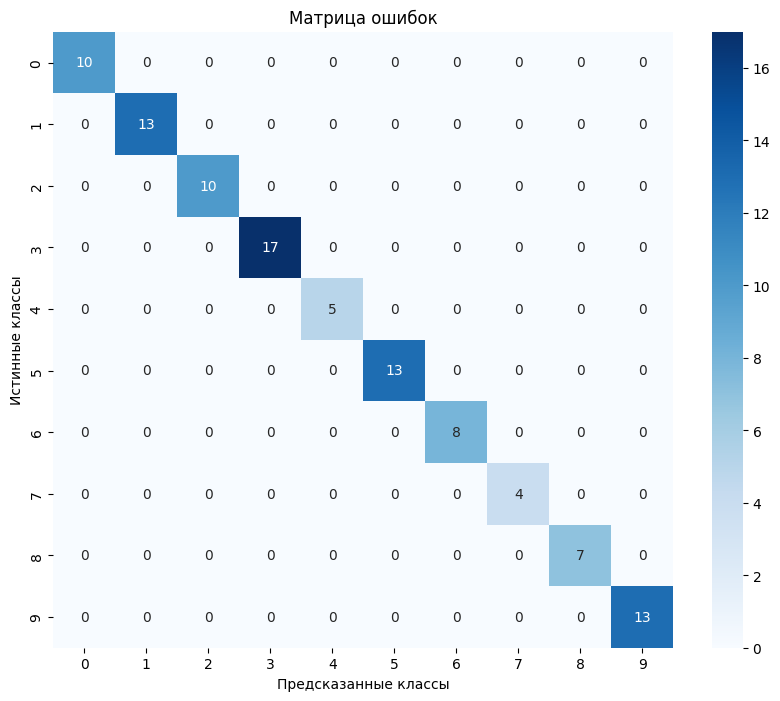

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        13

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
users_df = pd.read_csv('users_large.csv')
posts_df = pd.read_csv('posts_large.csv')
reposts_df = pd.read_csv('reposts_large.csv')

# Объединение данных
data = pd.merge(reposts_df, posts_df, left_on='original_post_id', right_on='post_id', suffixes=('_repost', '_post'))

# Преобразование текста в числовые векторы
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X_text = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=100)

# Преобразование временных меток в числовой формат
data['post_created_at'] = pd.to_datetime(data['post_created_at'])
data['repost_created_at'] = pd.to_datetime(data['repost_created_at'])
data['time_diff'] = (data['repost_created_at'] - data['post_created_at']).dt.total_seconds()

# Нормализация временной разницы
X_time = data['time_diff'].values.reshape(-1, 1)
X_time = (X_time - X_time.mean()) / X_time.std()

# Целевая переменная - идентификатор оригинального автора
y = data['user_id_post'].values

# Проверка и корректировка меток
unique_users = np.unique(y)
num_classes = len(unique_users)
print(f"Количество уникальных пользователей (классов): {num_classes}")

# Преобразование меток в диапазон [0, num_classes - 1]
label_mapping = {user_id: idx for idx, user_id in enumerate(unique_users)}
y = np.array([label_mapping[user_id] for user_id in y])

# Разделение данных на обучающую и тестовую выборки
X_text_train, X_text_test, X_time_train, X_time_test, y_train, y_test = train_test_split(
    X_text, X_time, y, test_size=0.2, random_state=42
)

# Создание модели
text_input = tf.keras.layers.Input(shape=(100,))
time_input = tf.keras.layers.Input(shape=(1,))

embedding = tf.keras.layers.Embedding(input_dim=10000, output_dim=128)(text_input)
lstm = tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedding)
combined = tf.keras.layers.Concatenate()([lstm, time_input])
dense = tf.keras.layers.Dense(128, activation='relu')(combined)
dropout = tf.keras.layers.Dropout(0.5)(dense)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(dropout)

model = tf.keras.models.Model(inputs=[text_input, time_input], outputs=output)

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ранняя остановка
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Мониторим потери на валидационной выборке
    patience=3,          # Количество эпох без улучшения перед остановкой
    restore_best_weights=True  # Восстановить веса лучшей модели
)

# Обучение модели с сохранением истории
history = model.fit(
    [X_text_train, X_time_train], y_train,
    epochs=50,  # Увеличиваем количество эпох
    batch_size=64,
    validation_data=([X_text_test, X_time_test], y_test),
    callbacks=[early_stopping]  # Добавляем раннюю остановку
)

# Построение графика потерь (loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Обучающая выборка (loss)')
plt.plot(history.history['val_loss'], label='Валидационная выборка (val_loss)')
plt.title('График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Построение графика точности (accuracy)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Обучающая выборка (accuracy)')
plt.plot(history.history['val_accuracy'], label='Валидационная выборка (val_accuracy)')
plt.title('График точности')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Оценка модели
loss, accuracy = model.evaluate([X_text_test, X_time_test], y_test)
print(f'Точность модели: {accuracy:.4f}')

# Тестирование на конкретном примере
random_index = np.random.randint(0, len(X_text_test))
sample_text = X_text_test[random_index]
sample_time = X_time_test[random_index]
sample_user = y_test[random_index]

# Преобразуем данные для предсказания
sample_text = sample_text.reshape(1, -1)
sample_time = sample_time.reshape(1, -1)

# Предсказание вероятностей для всех пользователей
probabilities = model.predict([sample_text, sample_time])

# Получим вероятности для конкретного пользователя
predicted_user_prob = probabilities[0][sample_user]

# Получим предсказанного пользователя
predicted_user = np.argmax(probabilities)

# Выведем результаты
print(f"Истинный автор поста: {sample_user}")
print(f"Предсказанный автор поста: {predicted_user}")
print(f"Вероятность того, что истинный автор является автором поста: {predicted_user_prob:.4f}")

# Проверим, совпадает ли предсказанный автор с истинным
if predicted_user == sample_user:
    print("Модель правильно предсказала автора поста.")
else:
    print("Модель не смогла правильно предсказать автора поста.")

# Матрица ошибок
y_pred = model.predict([X_text_test, X_time_test])
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Отчет о классификации
print(classification_report(y_test, y_pred_classes))

##Transformers

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Количество уникальных пользователей (классов): 10


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/50
25/25 [==============================] - 310s 11s/step - loss: 2.7582 - accuracy: 0.1075 - val_loss: 2.4784 - val_accuracy: 0.1300
Epoch 2/50
25/25 [==============================] - 247s 10s/step - loss: 2.3902 - accuracy: 0.1525 - val_loss: 2.3211 - val_accuracy: 0.1300
Epoch 3/50
25/25 [==============================] - 245s 10s/step - loss: 2.3081 - accuracy: 0.1400 - val_loss: 2.3006 - val_accuracy: 0.1300
Epoch 4/50
25/25 [==============================] - 251s 10s/step - loss: 2.2991 - accuracy: 0.1550 - val_loss: 2.2997 - val_accuracy: 0.1300
Epoch 5/50
25/25 [==============================] - 253s 10s/step - loss: 2.2975 - accuracy: 0.1550 - val_loss: 2.2988 - val_accuracy: 0.1300
Epoch 6/50
25/25 [==============================] - 247s 10s/step - loss: 2.2959 - accuracy: 0.1550 - val_loss: 2.2979 - val_accuracy: 0.1300
Epoch 7/50
25/25 [==============================] - 248s 10s/step - loss: 2.2944 - accuracy: 0.1550 - val_loss: 2.2970 - val_accuracy: 0.1300
Epoch 

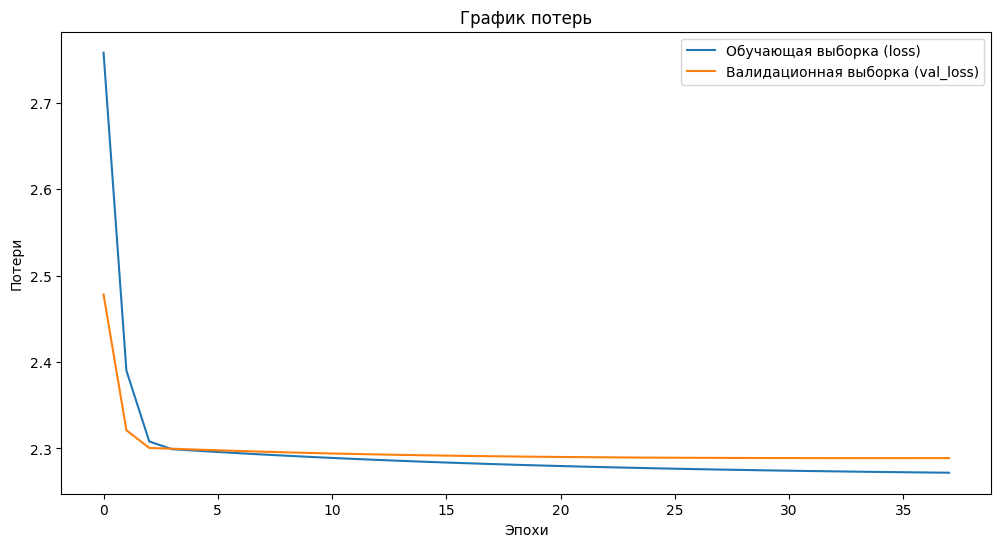

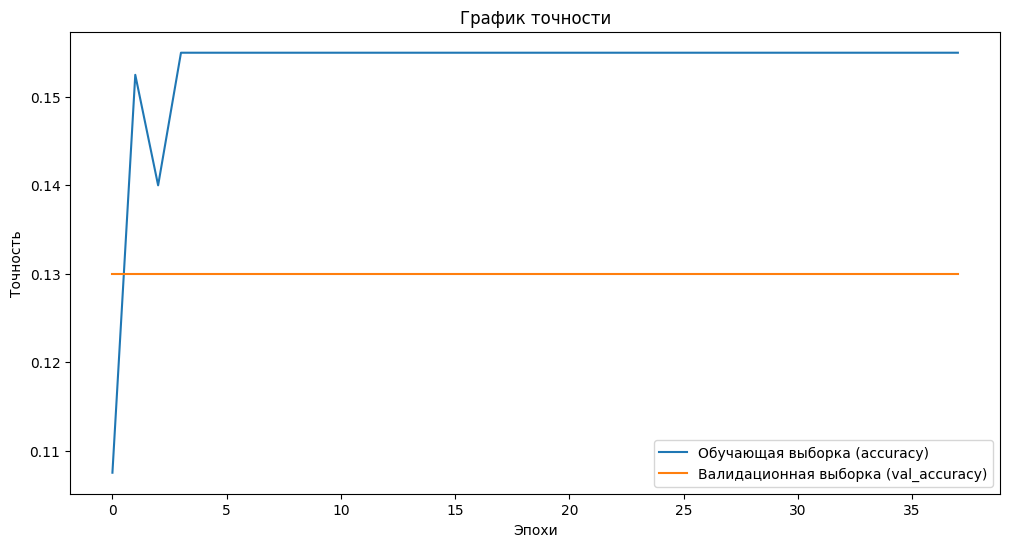

7/7 [==============================] - 16s 2s/step - loss: 2.2888 - accuracy: 0.1300
Точность модели: 0.1300
1/1 [==============================] - 4s 4s/step
Истинный автор поста: 3
Предсказанный автор поста: 5
Вероятность того, что истинный автор является автором поста: 0.1050
Модель не смогла правильно предсказать автора поста.
7/7 [==============================] - 20s 2s/step


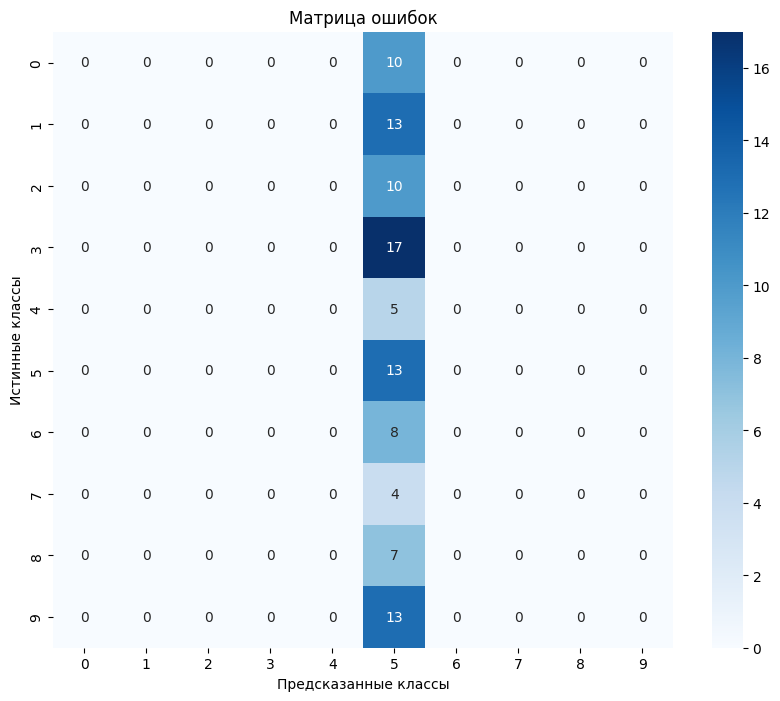

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         5
           5       0.13      1.00      0.23        13
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        13

    accuracy                           0.13       100
   macro avg       0.01      0.10      0.02       100
weighted avg       0.02      0.13      0.03       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import seaborn as sns

# Отключаем предупреждения
transformers.logging.set_verbosity_error()

# Загрузка данных
users_df = pd.read_csv('users_large.csv')
posts_df = pd.read_csv('posts_large.csv')
reposts_df = pd.read_csv('reposts_large.csv')

# Объединение данных
data = pd.merge(reposts_df, posts_df, left_on='original_post_id', right_on='post_id', suffixes=('_repost', '_post'))

# Преобразование текста с использованием BERT токенизатора
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
X_text = tokenizer(data['text'].tolist(), padding=True, truncation=True, max_length=50, return_tensors="tf")  # Уменьшенная длина последовательности

# Преобразование временных меток в числовой формат
data['post_created_at'] = pd.to_datetime(data['post_created_at'])
data['repost_created_at'] = pd.to_datetime(data['repost_created_at'])
data['time_diff'] = (data['repost_created_at'] - data['post_created_at']).dt.total_seconds()

# Нормализация временной разницы
X_time = data['time_diff'].values.reshape(-1, 1)
X_time = (X_time - X_time.mean()) / X_time.std()

# Целевая переменная - идентификатор оригинального автора
y = data['user_id_post'].values

# Проверка и корректировка меток
unique_users = np.unique(y)
num_classes = len(unique_users)
print(f"Количество уникальных пользователей (классов): {num_classes}")

# Преобразование меток в диапазон [0, num_classes - 1]
label_mapping = {user_id: idx for idx, user_id in enumerate(unique_users)}
y = np.array([label_mapping[user_id] for user_id in y])

# Разделение данных на обучающую и тестовую выборки
X_text_train, X_text_test, X_time_train, X_time_test, y_train, y_test = train_test_split(
    X_text['input_ids'].numpy(), X_time, y, test_size=0.2, random_state=42
)

# Создание пользовательского слоя для интеграции BERT
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, model_name='bert-base-uncased', **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = TFBertModel.from_pretrained(model_name)

    def call(self, inputs):
        return self.bert(inputs)[1]  # Используем выход [CLS] токена

# Создание модели
text_input = tf.keras.layers.Input(shape=(50,), dtype=tf.int32, name='input_ids')  # Уменьшенная длина
time_input = tf.keras.layers.Input(shape=(1,), name='time_input')

# Используем наш кастомный слой для BERT
bert_output = BertLayer()(text_input)
combined = tf.keras.layers.Concatenate()([bert_output, time_input])
dense = tf.keras.layers.Dense(128, activation='relu')(combined)
dropout = tf.keras.layers.Dropout(0.5)(dense)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(dropout)

model = tf.keras.models.Model(inputs=[text_input, time_input], outputs=output)

# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ранняя остановка
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Мониторим потери на валидационной выборке
    patience=3,          # Количество эпох без улучшения перед остановкой
    restore_best_weights=True  # Восстановить веса лучшей модели
)

# Использование tf.data.Dataset для эффективной работы с памятью
train_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": X_text_train, "time_input": X_time_train}, y_train))
train_dataset = train_dataset.batch(16).prefetch(tf.data.AUTOTUNE)  # Уменьшенный батч

val_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": X_text_test, "time_input": X_time_test}, y_test))
val_dataset = val_dataset.batch(16).prefetch(tf.data.AUTOTUNE)

# Обучение модели с сохранением истории
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

# Построение графика потерь (loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Обучающая выборка (loss)')
plt.plot(history.history['val_loss'], label='Валидационная выборка (val_loss)')
plt.title('График потерь')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

# Построение графика точности (accuracy)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Обучающая выборка (accuracy)')
plt.plot(history.history['val_accuracy'], label='Валидационная выборка (val_accuracy)')
plt.title('График точности')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Оценка модели
loss, accuracy = model.evaluate(val_dataset)
print(f'Точность модели: {accuracy:.4f}')

# Тестирование на конкретном примере
random_index = np.random.randint(0, len(X_text_test))
sample_text = X_text_test[random_index]
sample_time = X_time_test[random_index]
sample_user = y_test[random_index]

# Преобразуем данные для предсказания
sample_text = sample_text.reshape(1, -1)
sample_time = sample_time.reshape(1, -1)

# Предсказание вероятностей для всех пользователей
probabilities = model.predict([sample_text, sample_time])

# Получим вероятности для конкретного пользователя
predicted_user_prob = probabilities[0][sample_user]

# Получим предсказанного пользователя
predicted_user = np.argmax(probabilities)

# Выведем результаты
print(f"Истинный автор поста: {sample_user}")
print(f"Предсказанный автор поста: {predicted_user}")
print(f"Вероятность того, что истинный автор является автором поста: {predicted_user_prob:.4f}")

# Проверим, совпадает ли предсказанный автор с истинным
if predicted_user == sample_user:
    print("Модель правильно предсказала автора поста.")
else:
    print("Модель не смогла правильно предсказать автора поста.")

# Матрица ошибок
y_pred = model.predict(val_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Отчет о классификации
print(classification_report(y_test, y_pred_classes))

##GNN

Количество уникальных пользователей (классов): 10
Epoch: 001, Loss: 73.6566
Epoch: 002, Loss: 51.7241
Epoch: 003, Loss: 38.0363
Epoch: 004, Loss: 31.3020
Epoch: 005, Loss: 23.3081
Epoch: 006, Loss: 16.2716
Epoch: 007, Loss: 10.9208
Epoch: 008, Loss: 7.8748
Epoch: 009, Loss: 6.8948
Epoch: 010, Loss: 4.9162
Epoch: 011, Loss: 4.1284
Epoch: 012, Loss: 3.5834
Epoch: 013, Loss: 2.8533
Epoch: 014, Loss: 2.1831
Epoch: 015, Loss: 1.8040
Epoch: 016, Loss: 1.5095
Epoch: 017, Loss: 1.5563
Epoch: 018, Loss: 1.2001
Epoch: 019, Loss: 1.0826
Epoch: 020, Loss: 0.9597
Epoch: 021, Loss: 0.7693
Epoch: 022, Loss: 0.6458
Epoch: 023, Loss: 0.8649
Epoch: 024, Loss: 0.6752
Epoch: 025, Loss: 0.6465
Epoch: 026, Loss: 0.5909
Epoch: 027, Loss: 0.6192
Epoch: 028, Loss: 0.5955
Epoch: 029, Loss: 0.4138
Epoch: 030, Loss: 0.5346
Epoch: 031, Loss: 0.4836
Epoch: 032, Loss: 0.4866
Epoch: 033, Loss: 0.3887
Epoch: 034, Loss: 0.4619
Epoch: 035, Loss: 0.3687
Epoch: 036, Loss: 0.5125
Epoch: 037, Loss: 0.3865
Epoch: 038, Loss: 

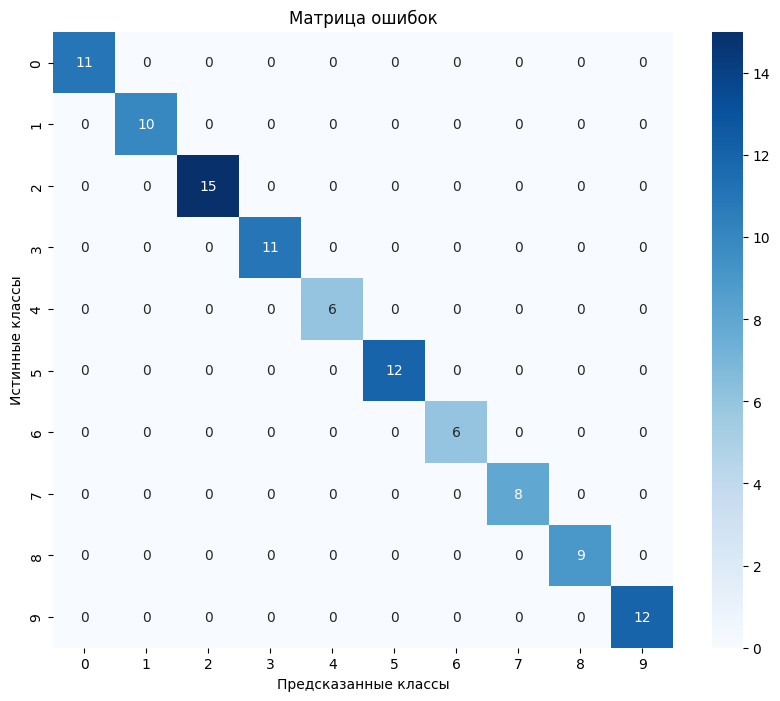

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        12

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Истинный автор поста: 3
Предсказанный автор поста: 0
Вероятность того, что истинный автор является автором поста: 0.0000
Модель не смогла правильно предсказать автора поста.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf  # Для токенизации текста

# Загрузка данных
users_df = pd.read_csv('users_large.csv')
posts_df = pd.read_csv('posts_large.csv')
reposts_df = pd.read_csv('reposts_large.csv')

# Объединение данных
data = pd.merge(reposts_df, posts_df, left_on='original_post_id', right_on='post_id', suffixes=('_repost', '_post'))

# Преобразование текста в числовые векторы
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X_text = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=100)

# Преобразование временных меток в числовой формат
data['post_created_at'] = pd.to_datetime(data['post_created_at'])
data['repost_created_at'] = pd.to_datetime(data['repost_created_at'])
data['time_diff'] = (data['repost_created_at'] - data['post_created_at']).dt.total_seconds()

# Нормализация временной разницы
X_time = data['time_diff'].values.reshape(-1, 1)
X_time = (X_time - X_time.mean()) / X_time.std()

# Целевая переменная - идентификатор оригинального автора
y = data['user_id_post'].values

# Проверка и корректировка меток
unique_users = np.unique(y)
num_classes = len(unique_users)
print(f"Количество уникальных пользователей (классов): {num_classes}")

# Преобразование меток в диапазон [0, num_classes - 1]
label_mapping = {user_id: idx for idx, user_id in enumerate(unique_users)}
y = np.array([label_mapping[user_id] for user_id in y])

# Разделение данных на обучающую и тестовую выборки
X_text_train, X_text_test, X_time_train, X_time_test, y_train, y_test = train_test_split(
    X_text, X_time, y, test_size=0.2, random_state=42
)

# Создание графа
edge_index = torch.tensor([
    data['user_id_repost'].values,
    data['user_id_post'].values
], dtype=torch.long)

x = torch.tensor(np.hstack([X_text, X_time]), dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

data = Data(x=x, edge_index=edge_index, y=y)

# Создание масок для обучения и тестирования
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

train_indices = range(len(X_text_train))
test_indices = range(len(X_text_train), len(X_text_train) + len(X_text_test))

train_mask[train_indices] = True
test_mask[test_indices] = True

# Добавление масок в объект data
data.train_mask = train_mask
data.test_mask = test_mask

# Определение модели GNN
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Инициализация модели
model = GCN(num_features=X_text.shape[1] + X_time.shape[1], hidden_channels=128, num_classes=num_classes)

# Оптимизатор
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Обучение модели
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    logits = model(data.x, data.edge_index)
    pred = logits.argmax(dim=1)
    acc = pred[data.test_mask].eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

for epoch in range(1, 201):
    loss = train()
    log = 'Epoch: {:03d}, Loss: {:.4f}'
    print(log.format(epoch, loss))

# Оценка модели
test_acc = test()
print(f'Точность модели: {test_acc:.4f}')

# Матрица ошибок
model.eval()
pred = model(data.x, data.edge_index).argmax(dim=1)
conf_matrix = confusion_matrix(data.y[data.test_mask].numpy(), pred[data.test_mask].numpy())
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица ошибок')
plt.show()

# Отчет о классификации
print(classification_report(data.y[data.test_mask].numpy(), pred[data.test_mask].numpy()))

# Тестирование на конкретном примере
random_index = np.random.randint(0, len(X_text_test))
sample_text = X_text_test[random_index]
sample_time = X_time_test[random_index]
sample_user = y_test[random_index]

# Преобразуем данные для предсказания
sample_text = torch.tensor(sample_text, dtype=torch.float).unsqueeze(0)  # Добавляем batch dimension
sample_time = torch.tensor(sample_time, dtype=torch.float).unsqueeze(0)  # Добавляем batch dimension
sample_features = torch.cat([sample_text, sample_time], dim=1)  # Объединяем текстовые и временные признаки

# Убедимся, что модель в режиме оценки
model.eval()

# Предсказание вероятностей для всех пользователей
with torch.no_grad():  # Отключаем вычисление градиентов
    logits = model(data.x, data.edge_index)  # Получаем логиты для всех узлов
    sample_logits = logits[data.test_mask][random_index]  # Логиты для выбранного примера
    probabilities = F.softmax(sample_logits, dim=0)  # Преобразуем логиты в вероятности

# Получим вероятности для конкретного пользователя
predicted_user_prob = probabilities[sample_user].item()

# Получим предсказанного пользователя
predicted_user = torch.argmax(probabilities).item()

# Выведем результаты
print(f"Истинный автор поста: {sample_user}")
print(f"Предсказанный автор поста: {predicted_user}")
print(f"Вероятность того, что истинный автор является автором поста: {predicted_user_prob:.4f}")

# Проверим, совпадает ли предсказанный автор с истинным
if predicted_user == sample_user:
    print("Модель правильно предсказала автора поста.")
else:
    print("Модель не смогла правильно предсказать автора поста.")